<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cryptocurrency-Analysis-with-Python:-Understanding-Normalization,-Returns,-Rewards,-and-Risk" data-toc-modified-id="Cryptocurrency-Analysis-with-Python:-Understanding-Normalization,-Returns,-Rewards,-and-Risk-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cryptocurrency Analysis with Python: Understanding Normalization, Returns, Rewards, and Risk</a></span><ul class="toc-item"><li><span><a href="#Normalizing-Data" data-toc-modified-id="Normalizing-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Normalizing Data</a></span></li><li><span><a href="#Realtive-Price-changes---Returns:" data-toc-modified-id="Realtive-Price-changes---Returns:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Realtive Price changes - Returns:</a></span></li><li><span><a href="#Reward" data-toc-modified-id="Reward-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Reward</a></span></li><li><span><a href="#Risks-or-Volatility" data-toc-modified-id="Risks-or-Volatility-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Risks or Volatility</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#References:" data-toc-modified-id="References:-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>References:</a></span></li></ul></li></ul></div>

# Cryptocurrency Analysis with Python: Understanding Normalization, Returns, Rewards, and Risk
Find more tutorials about Computer Vision, Microscopy, Biology and Data Science [here](https://medium.com/@microbioscopicdata)

<p style="text-align: justify;">Welcome back to our tutorial series on Cryptocurrency Analysis with Python! In our previous tutorial, we explored how to use powerful Python libraries such as Matplotlib, mplfinance, and yfinance to load and visualize cryptocurrency data from popular sources like Yahoo Finance. In this tutorial, we will explore essential concepts of normalizing data and understanding returns, rewards, and risk in the context of cryptocurrencies. We'll uncover the significance of returns, rewards, and risk, metrics essential for assessing the performance of cryptocurrencies, comparing their potential profitability, and evaluating the associated risks.</div?

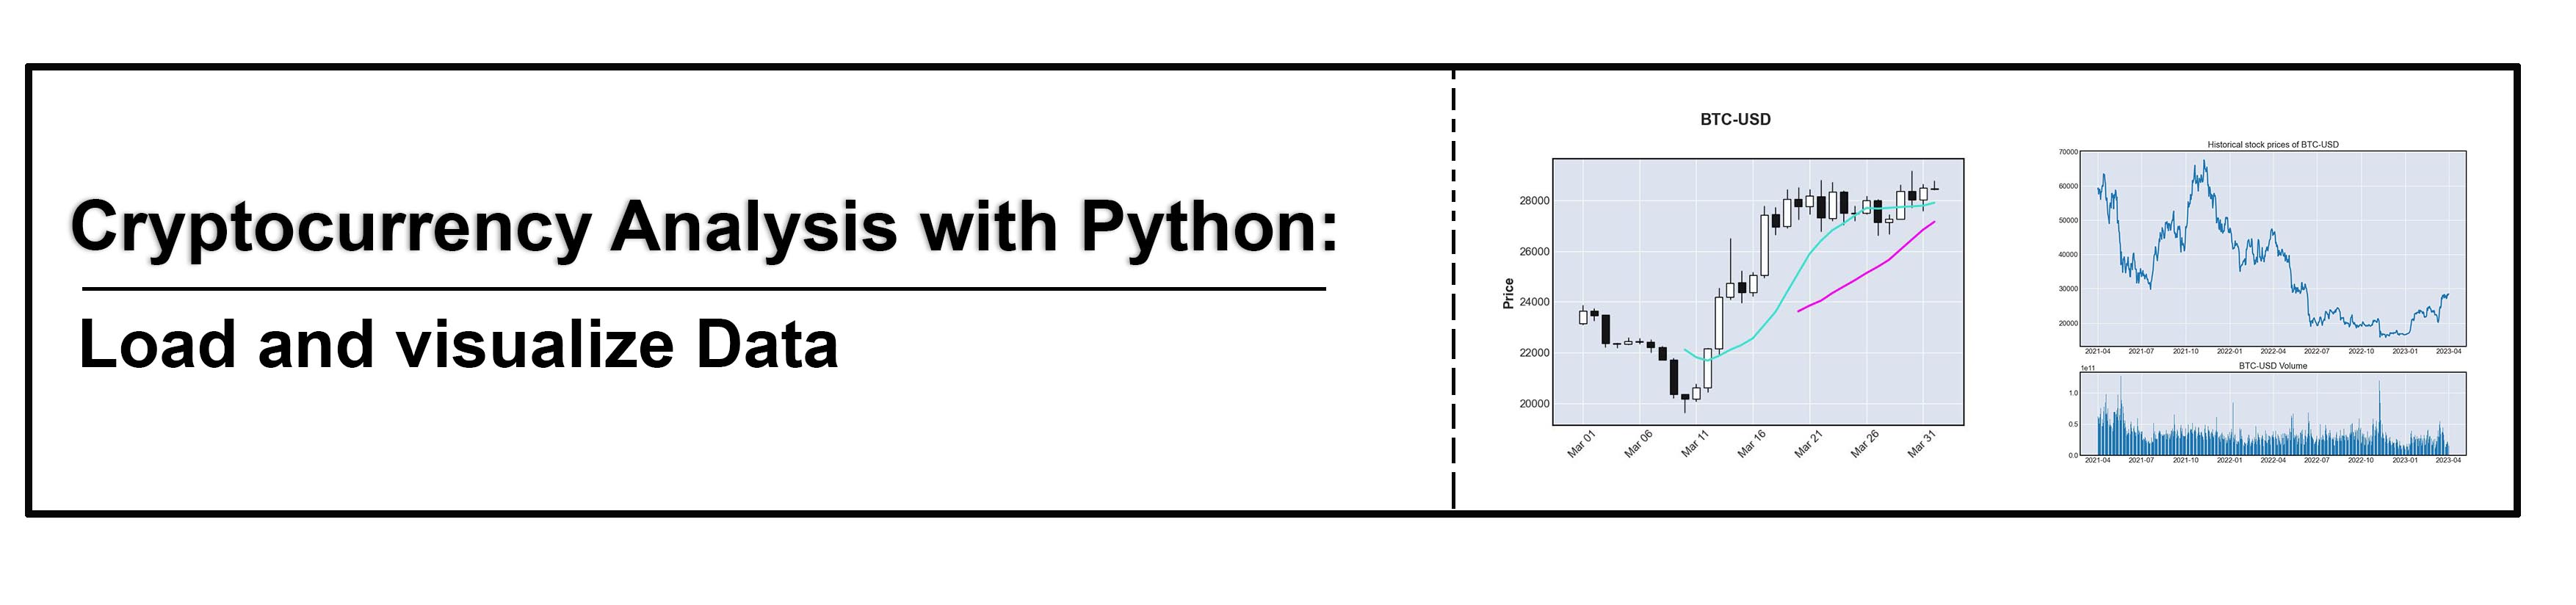

In [1]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Normalizing Data 
<p style="text-align: justify;">
To compare different cryptocurrencies, absolute prices are often meaningless because prices that are on different scales are not directly comparable. For example, if we want to compare two cryptocurrencies like Ethereum and Bitcoin, visually comparing their absolute prices is of limited value (Figure 1) due to the different price scales of these two assets (Bitcoin is priced in the tens of thousands while Ethereum is in the thousands). To enable meaningful comparisons between assets that are on different scales, we need to normalize the data.  

By normalizing the data, we transform it onto a common scale, bringing all cryptocurrencies to a standardized starting point, enabling a more straightforward analysis of their relative performance and price fluctuations.</div>

![MyImage](figure1.png)
Figure 1: Line charts comparing the absolute prices of Ethereum and Bitcoin. The comparison/graph is not informative due to the different price scales of these two assets (figure provided by the author).

<p style="text-align: justify;"> Normalization is a method used to transform data onto a common scale, making it easier to see how the prices fluctuate (up or down) in comparison to each other [1]. One common normalization technique(there are several techniques commonly used in data analysis and machine learning) is just to divide the prices of each asset by its first-day price (first row) and then multiply by 100. This will make all the assets have the same starting point (base value of 100) </div>. 

[*********************100%***********************]  2 of 2 completed
               BTC-USD     ETC-USD
Date                              
2020-12-31  100.000000  100.000000
2021-01-01  101.284171  100.471312
2021-01-02  110.777108  101.847193
2021-01-03  113.034753  115.496348
2021-01-04  110.241438  123.552237


<Axes: xlabel='Date'>

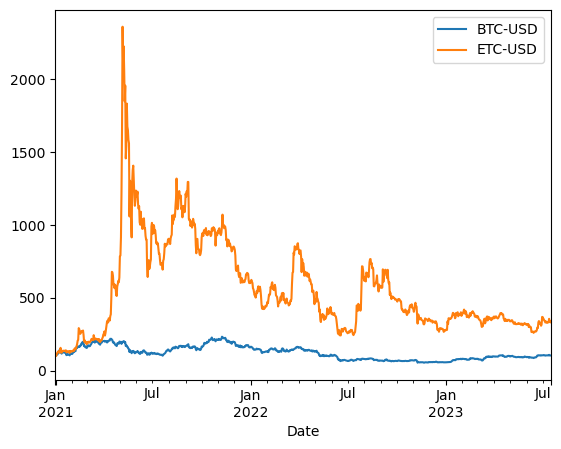

In [2]:
# Define the cryptocurrency symbol and the date range
symbol = ['BTC-USD',"ETC-USD"]  # Bitcoinand Ethereum
start_date = '2021-01-01'
end_date = '2023-07-18'

# Retrieve the historical price data for the specified cryptocurrency symbols
data = yf.download(symbol, start=start_date, end=end_date)
data = data["Close"] #Extracts only the "Close" column

# Normalize the data = divide by the first value and multiply by 100
normalized = data.div(data.iloc[0]).mul(100)

# Print normalized dataframe
print(normalized.head(5))

# Generate the plot using data.plot()
normalized.plot()

<p style="text-align: justify;">To compare the two time series is challenging due to the difference in performance between Ethereum and Bitcoin. However, to enhance visualization, we can create a logarithmic scale plot by setting the logy parameter to True. The logarithmic scale helps especially when dealing with cryptocurrencies that experience significant variations in price over time.<div>

<Axes: xlabel='Date'>

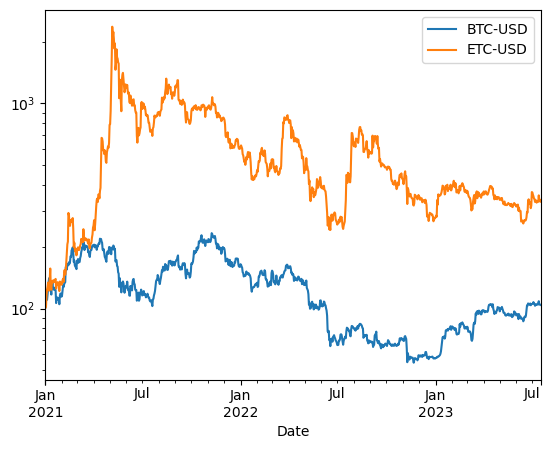

In [3]:
# Generate the plot using data.plot()
normalized.plot(logy=True)

## Realtive Price changes - Returns:

<p style="text-align: justify;">Having understood the importance of normalizing data to facilitate meaningful comparisons between cryprocurrencies on different scales, let's now shift our focus to analyzing the relative price changes, commonly known as returns. By examining returns, we can gain deeper insights into how these cryptocurrencies have performed over time, which in turn enables us to make more informed investment decisions and potentially achieve profit. 
    
The revenue or loss from investing depends on the amount invested and changes in prices. The price change is the difference between a financial instrument’s initial and final value. It can be negative or positive.   
    
This is what returns measure, changes in price as a fraction of the initial price over a specific period of time, for example, one business day. Returns serve as a normalized metric for the standardized comparison between different cryptocurrencies, regardless of their absolute price levels.   </div>

    
Return = $\frac {Period\;Ending\;Price\;(t)}{Period\;Starting\;Price\;(t-1)} -1$
    

    
<b>Example:</b>  
    
Suppose cryprocurrency A has a starting price of 100€ and increases to 120€ over a given period, resulting in a 20% return. On the other hand, cryprocurrency B has a starting price of 10€ and increases to 15€ over the same period, yielding a 50% return. 
    
    
    
| | Cryprocurrency A | Cryprocurrency B| 
|:--------:|:--------:|:--------:|
| Starting Price| 100€ | 10€| 
| Ending Price| 120€ | 15€| 
| Return| $\frac {120}{100} -1$ = 20% | $\frac {15}{10} -1$ = 50%| 
    
    
<p style="text-align: justify;">If we compare the absolute prices of cryprocurrency A and cryprocurrency B, we might conclude that cryprocurrency A is the better performer simply because it has a higher price (120€) compared to Stock B (15€). However, this conclusion would be misleading.

By considering the returns, we gain a more accurate understanding of the  performance of the two cryprocurrencies. Cryprocurrency B's 50% return indicates a significant increase in value compared to cryprocurrency A's 20% return (see table above). Even though the absolute price of cryprocurrency B is lower, its returns demonstrate a better percentage gain compared to cryprocurrency A.
 </div>

   

<p style="text-align: justify;">The code below calculates the Returns (percentage changes) for Bitcoin prices using two different methods: a manual calculation and using the pct_change() function. The "lag" column is created to store the lagged values of the "Price" column, enabling the calculation of the Return. The resulting DataFrame includes the original price of Bitcoin, the manually calculated Returns, and the Returns calculated using the pct_change() function.</div>

In [4]:
# Create a new DataFrame named "bitcoin"
bitcoin = data['BTC-USD'].to_frame()
# Rename the "BTC-USD" column in the "bitcoin" DataFrame to "Price"
bitcoin.rename(columns = {"BTC-USD":"Price"}, inplace=True)
# Create a new column named "lag" that contains the lagged (previous) values of the "Price" column
bitcoin["lag"] = bitcoin['Price'].shift(1)
# Calculate daily returns - manually
bitcoin["Returns_manual"] = bitcoin['Price'].div(bitcoin["lag"])-1
# Calculate daily returns (percentage change method)
bitcoin["Returns"] = bitcoin['Price'].pct_change(1)
# Remove any rows with missing (NaN) 
bitcoin = bitcoin.dropna()
bitcoin.head(3)

,Price,lag,Returns_manual,Returns
Date,,,,
2021-01-01,29374.152344,29001.720703,0.012842,0.012842
2021-01-02,32127.267578,29374.152344,0.093726,0.093726
2021-01-03,32782.023438,32127.267578,0.020380,0.020380


## Reward 
<p style="text-align: justify;">   Cryptocurrencies that are considered safer typically offer lower returns, while riskier cryptocurrencies may provide higher returns. This because potential reward is the enticement for taking on higher risk.lthough there are various performance metrics to evaluate investment rewards, mean returns are commonly used in the world of cryptos.A Rewards provide an indication of the profitability/gain and potential benefits of an investment. Rewards (Mean returns) are calculated by finding the average percentage change in an investment's value over a given time period.  </div>

<b>To calculate the Reward for Bitcoin:</b> 

In [5]:
# Calculate the mean return of the Bitcoin investment
bitcoin_reward =bitcoin["Returns"].mean()
print(f"The daily Reward (Mean Return) for Bitcoin is: {bitcoin_reward}")

The daily Reward (Mean Return) for Bitcoin is: 0.0006756459292016408


## Risks or Volatility

<p style="text-align: justify;"> Risks, on the other hand, represent the potential for losses or negative outcomes associated with an investment. Assessing risks is crucial for understanding the potential downside of an investment and making informed decisions. Risk is typically measured by analyzing the variability or dispersion of an investment's price or returns between the start and end of the time period being analyzed.</div>

<b>To calculate the Risk for Bitcoin:</b> 

In [6]:
# Calculate the Risk for the Bitcoin investment
bitcoin_risk =bitcoin["Returns"].std()
print(f"The daily Risk (Volatility) for Bitcoin is: {bitcoin_risk}")

The daily Risk (Volatility) for Bitcoin is: 0.035598976602066464


## Conclusions

<p style="text-align: justify;">   
In conclusion, throughout this tutorial, we have explored essential concepts and techniques for analyzing cryptocurrency data. We began by understanding the significance of normalizing prices, which enabled us to make meaningful comparisons between different assets on varying scales. By diving into the world of returns, a critical metric for evaluating the historical performance of cryptocurrencies, we gained deeper insights into how these assets performed over specific time periods.

Furthermore, we focused on rewards and risks, represented by the mean and the standard deviation of returns, respectively.  Both of these metrics serve as powerful tools to evaluate the performance of cryptocurrencies.
    
 As we continue our journey in the next tutorial series on Cryptocurrency Analysis with Python, we will build upon this foundation and explore more advanced techniques and strategies to further enhance our understanding and decision-making capabilities in the continuously changing world of cryptocurrencies. See you in the next tutorial!
    
    
   

I have prepared a Jupyter Notebook to accompany this blog post, which can be viewed in my [GitHub](https://github.com/MicroBioScopicData/BioImage_matplotlib).

![SegmentLocal](Animated_logo_smaller_faster.gif "segment")

## References:
<p style="text-align: justify;"> [1]	T. A. Atwan, Time Series Analysis with Python Cookbook: Practical recipes for exploratory data analysis, data preparation, forecasting, and model evaluation. Birmingham: Packt Publishing, 2022.  
    
[2]	“Cryptocurrency Algorithmic Trading with Python and Binance,” Udemy. https://www.udemy.com/course/cryptocurrency-algorithmic-trading-with-python-and-binance/ (accessed Jul. 18, 2023).  
    
[3]	“Risk-Return Tradeoff: How the Investment Principle Works,” Investopedia. https://www.investopedia.com/terms/r/riskreturntradeoff.asp (accessed Jul. 15, 2023).</div>
